In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns, statsmodels.api as sm

from scipy import stats

In [ ]:
from sklearn import preprocessing

In [ ]:
df=pd.read_csv(r'/content/Student_Performance.csv')

In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


In [ ]:
label = "Performance Index"


y= df['Performance Index']
x=df[['Hours Studied' ,'Previous Scores','Sample Question Papers Practiced','Sleep Hours']].assign(const=1)

model = sm.OLS(y,x)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.147e+05
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:30:12   Log-Likelihood:                -21418.
No. Observations:               10000   AIC:                         4.285e+04
Df Residuals:                    9995   BIC:                         4.288e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Hours St

In [ ]:


# Define the input values for prediction
input_values = pd.DataFrame({
    'Hours Studied': [7],
    'Previous Scores': [88],
    'Sample Question Papers Practiced': [6],
    'Sleep Hours': [4],
    'const': [1]  # Don't forget the constant term if you included it in your model
})

# Use the fitted model to make predictions
predictions = results.predict(input_values)

print(predictions)

0    78.922152
dtype: float64


In [ ]:
df['Predictions']= results.fittedvalues
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Predictions
0,7,99,Yes,9,1,91.0,91.532244
1,4,82,No,4,2,65.0,63.469569
2,8,51,Yes,7,2,45.0,44.736196
3,5,52,Yes,5,2,36.0,36.241825
4,7,75,No,8,5,66.0,67.390699
...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,21.296025
9996,7,64,Yes,8,5,58.0,56.186280
9997,6,83,Yes,8,5,74.0,72.685938
9998,9,97,Yes,7,0,95.0,94.054071


In [ ]:
df = pd.get_dummies(df, columns=['Extracurricular Activities'], prefix=['Extracurricular Activities'], drop_first=True)

In [ ]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Predictions,Extracurricular Activities_Yes
0,7,99,9,1,91.0,91.532244,1
1,4,82,4,2,65.0,63.469569,0
2,8,51,7,2,45.0,44.736196,1
3,5,52,5,2,36.0,36.241825,1
4,7,75,8,5,66.0,67.390699,0


In [ ]:
label="Performance Index"

y=df['Performance Index']
x=df.drop(columns=[label])



results= sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:04:27   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Hours St

In [ ]:
df_zscores = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df),columns=df.columns)
df_zscores.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Predictions,Extracurricular Activities_Yes
0,0.775188,1.704176,1.456205,-1.249754,1.862167,1.900834,1.010455
1,-0.383481,0.723913,-1.492294,-0.900982,0.508818,0.431645,-0.989654
2,1.161410,-1.063626,0.276805,-0.900982,-0.532220,-0.549119,1.010455
3,0.002742,-1.005963,-0.902594,-0.900982,-1.000687,-0.993832,1.010455
4,0.775188,0.320275,0.866505,0.145333,0.560870,0.636932,-0.989654


In [ ]:
y=df_zscores['Performance Index']
x=df_zscores.drop(columns=['Performance Index','Predictions'])

results=sm.OLS(y,x).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          1.757e+05
Date:                Wed, 21 Feb 2024   Prob (F-statistic):                        0.00
Time:                        10:33:32   Log-Likelihood:                          8248.6
No. Observations:               10000   AIC:                                 -1.649e+04
Df Residuals:                    9995   BIC:                                 -1.645e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

<Axes: xlabel='Performance Index', ylabel='Count'>

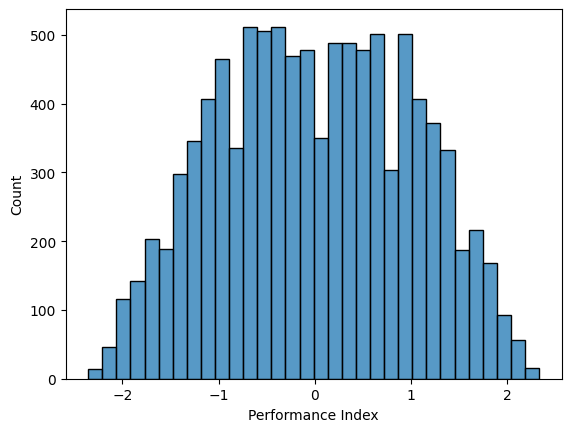

In [ ]:
sns.histplot(y)


<Axes: xlabel='Performance Index', ylabel='Count'>

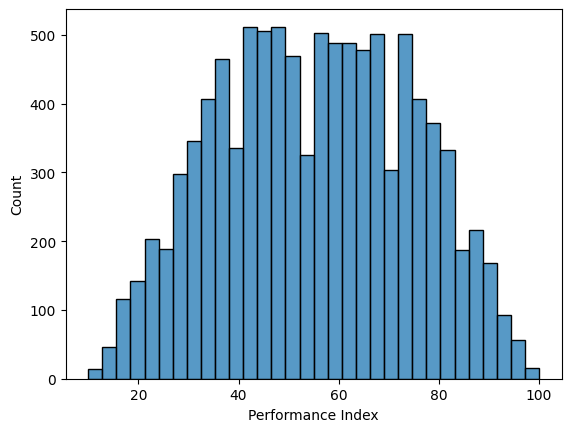

In [ ]:
sns.histplot(df['Performance Index'])

In [ ]:
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df),columns=df.columns)
df_minmax.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Predictions,Extracurricular Activities_Yes
0,0.750,1.000000,1.0,0.111111,0.900000,0.923292,1.0
1,0.375,0.711864,0.0,0.222222,0.611111,0.596983,0.0
2,0.875,0.186441,0.6,0.222222,0.388889,0.379154,1.0
3,0.500,0.203390,0.2,0.222222,0.288889,0.280383,1.0
4,0.750,0.593220,0.8,0.555556,0.622222,0.642578,0.0


<Axes: xlabel='Performance Index', ylabel='Count'>

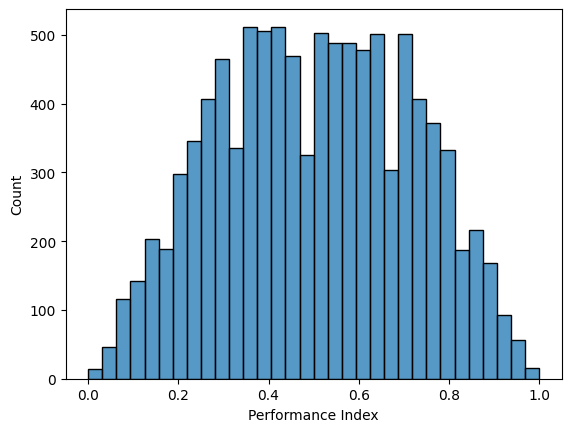

In [ ]:
sns.histplot(df_minmax['Performance Index'])

<Axes: xlabel='Performance Index', ylabel='Count'>

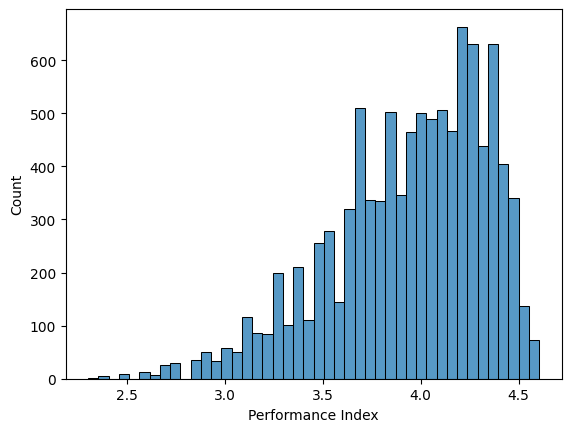

In [ ]:
sns.histplot(np.log(df['Performance Index']))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('Student_Performance.csv')

# Define features (X) and target variable (y)
X = data[['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced']]
y = data['Performance Index']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Evaluate models using cross-validation
for name, model in models.items():
    print(f"Training {name}...")
    # Perform cross-validation with 10 folds
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    # Calculate root mean squared error (RMSE)
    rmse_scores = np.sqrt(-cv_scores)
    # Print average RMSE
    print(f"Average RMSE for {name}: {rmse_scores.mean()}")

    # Fit the model on the full training data
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE on the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Test RMSE for {name}: {test_rmse}\n")


Training Linear Regression...
Average RMSE for Linear Regression: 2.216945862631255
Test RMSE for Linear Regression: 2.2050770533406636

Training Decision Tree...
Average RMSE for Decision Tree: 2.940546472746113
Test RMSE for Decision Tree: 2.8437581112988903

Training Random Forest...
Average RMSE for Random Forest: 2.5912694204524316
Test RMSE for Random Forest: 2.5193781705630465

Training Gradient Boosting...
Average RMSE for Gradient Boosting: 2.2746614644256873
Test RMSE for Gradient Boosting: 2.25304628849305



In [ ]:
# Evaluate models using cross-validation
for name, model in models.items():
    print(f"Training {name}...")
    # Perform cross-validation with 10 folds
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    # Calculate root mean squared error (RMSE)
    rmse_scores = np.sqrt(-cv_scores)
    # Print average RMSE
    print(f"Average RMSE for {name}: {rmse_scores.mean()}")

    # Fit the model on the full training data
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE on the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Test RMSE for {name}: {test_rmse}\n")

Training Linear Regression...
Average RMSE for Linear Regression: 2.216187322191154
Test RMSE for Linear Regression: 2.2050770533406636

Training Decision Tree...
Average RMSE for Decision Tree: 2.9169826540947557
Test RMSE for Decision Tree: 2.845079656377618

Training Random Forest...
Average RMSE for Random Forest: 2.5898195795643826
Test RMSE for Random Forest: 2.516761637701089

Training Gradient Boosting...
Average RMSE for Gradient Boosting: 2.265470197407487
Test RMSE for Gradient Boosting: 2.25304628849305



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('Student_Performance.csv')

# Define features (X) and target variable (y)
X = data[['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced']]
y = data['Performance Index']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regression model
model = GradientBoostingRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE for Gradient Boosting:", test_rmse)


Test RMSE for Gradient Boosting: 2.25304628849305


In [ ]:
# Assume 'new_data' is a DataFrame containing new input data
new_data = pd.DataFrame({
    'Hours Studied': [5.0, 4.5, 6.0],
    'Previous Scores': [85, 90, 78],
    'Sample Question Papers Practiced': [3, 2, 4],
    'Extracurricular Activities': ['Yes', 'No', 'Yes']
})

# Preprocess the new data
# Encode 'Extracurricular Activities' to numeric values (0 for 'No', 1 for 'Yes')
#new_data['Extracurricular Activities'] = label_encoder.transform(new_data['Extracurricular Activities'])

# Assuming you have already defined and trained the model ('svm_model')

# Make predictions on the new data
new_predictions = model.predict(new_data[['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced']])

# Print the predictions
print("Predictions on new data:")
print(new_predictions)


Predictions on new data:
[71.93618496 72.64368012 66.52786768]


In [ ]:
data.count()

Hours Studied                       10000
Previous Scores                     10000
Extracurricular Activities          10000
Sleep Hours                         10000
Sample Question Papers Practiced    10000
Performance Index                   10000
dtype: int64

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame


# Print attribute names and their corresponding data types
print("Attribute Name\t\tData Type")
print("----------------------------------")
for column in df.columns:
    print(f"{column}\t\t{df[column].dtype}")


Attribute Name		Data Type
----------------------------------
Hours Studied		int64
Previous Scores		int64
Extracurricular Activities		object
Sleep Hours		int64
Sample Question Papers Practiced		int64
Performance Index		float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = 'Student_Performance.csv'
data = pd.read_csv(file_path)

# Select features and target
features = data[['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced']]
target = data['Performance Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import tensorflow as tf

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 1738.4943 - mae: 34.3845 - val_loss: 86.7883 - val_mae: 7.4775
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 66.7525 - mae: 6.5068 - val_loss: 54.4718 - val_mae: 5.9850
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 44.2254 - mae: 5.3218 - val_loss: 35.1051 - val_mae: 4.7829
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 27.5021 - mae: 4.1877 - val_loss: 20.9615 - val_mae: 3.6840
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 16.3588 - mae: 3.2075 - val_loss: 12.4550 - val_mae: 2.8349
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 10.0915 - mae: 2.5076 - val_loss: 7.9857 - val_mae: 2.2542
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 6.9981 - mae: 2.0876 - val_loss: 6.1924 - val_mae: 1.9855
Epoch 8/50
200/200 [==============================] - 0s 2ms/s

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print("Test MAE:", mae)

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('performance_index_predictor.tflite', 'wb') as f:
    f.write(tflite_model)


63/63 [==============================] - 0s 3ms/step - loss: 5.3148 - mae: 1.8279
Test MAE: 1.827876091003418


In [ ]:
model.predict([2,56,4])

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=False
      • mask=None


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
data = pd.read_csv("Student_Performance.csv")

# Preprocessing
# Convert 'Extracurricular Activities' to numerical
data['Extracurricular Activities'] = pd.factorize(data['Extracurricular Activities'])[0]

# Select features and target
X = data[['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced']]
y = data['Performance Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test MAE: {mae}')

# You can save the model for later use
model.save('performance_prediction_model.h5')


Epoch 1/50
200/200 [==============================] - 3s 9ms/step - loss: 1924.7529 - mae: 37.8438 - val_loss: 111.1553 - val_mae: 8.6085
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 73.5824 - mae: 6.8722 - val_loss: 59.8568 - val_mae: 6.2247
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 48.3041 - mae: 5.5319 - val_loss: 39.2009 - val_mae: 5.0406
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 31.3889 - mae: 4.4636 - val_loss: 24.4868 - val_mae: 3.9664
Epoch 5/50
200/200 [==============================] - 1s 6ms/step - loss: 19.9606 - mae: 3.5499 - val_loss: 15.7367 - val_mae: 3.1591
Epoch 6/50
200/200 [==============================] - 2s 11ms/step - loss: 13.4046 - mae: 2.8898 - val_loss: 11.0271 - val_mae: 2.6441
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 9.7202 - mae: 2.4512 - val_loss: 8.1956 - val_mae: 2.2827
Epoch 8/50
200/200 [==============================] - 0s 2m

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
